In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv('../Datasets/synth_temp.csv')

In [3]:
df.head()

,Region,Year,RgnAvTemp
0,A,1841,12.557395
1,B,1841,13.267048
2,E,1841,12.217463
3,F,1841,13.189420
4,A,1842,13.462887


There are 4 points in 1841
and 12 points in 2010
and 12 points in 1902


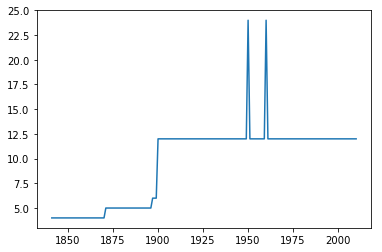

In [4]:
#
# take a quick look at the number of data points per year
#
print('There are ' + 
      str(len(df.loc[df['Year'] == 1841])) + 
      ' points in 1841\n' +
      'and ' +
      str(len(df.loc[df['Year'] == 2010])) +
      ' points in 2010\n' +
      'and ' +
      str(len(df.loc[df['Year'] == 1902])) +
      ' points in 1902')
#
# seeing there are differnt numbers of points, let's do a quick chart
#
fig, ax = plt.subplots()
ax.plot(df['Year'].unique(),
        [len(df.loc[df['Year'] == i]) 
         for i in df['Year'].unique()])
plt.show()

In [5]:
#
# slice 1902 and forward
#
df = df.loc[df.Year > 1901]
df.head()

,Region,Year,RgnAvTemp
292,A,1902,17.021583
293,B,1902,17.590253
294,C,1902,17.493082
295,D,1902,18.706166
296,E,1902,17.390903


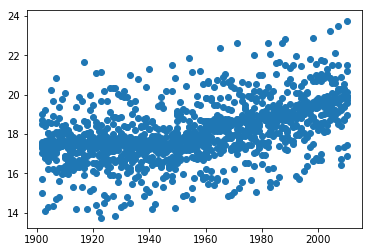

In [6]:
#
# quick plot to understand the data so far
#
fig, ax = plt.subplots()
ax.scatter(df.Year, df.RgnAvTemp)
plt.show()

In [7]:
#
# roll up by year
#
df_group_year = (df.groupby('Year').agg('mean').rename(
    columns =  {'RgnAvTemp' : 'AvgTemp'}))
print(df_group_year.head())
print(df_group_year.tail())

        AvgTemp
Year           
1902  17.385044
1903  17.222163
1904  17.217215
1905  17.817502
1906  17.386445
        AvgTemp
Year           
2006  19.904999
2007  19.820224
2008  19.245558
2009  19.537290
2010  19.919115


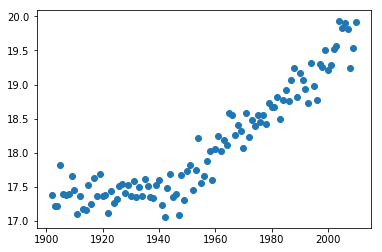

In [8]:
#
# visualize result of averaging over each year
#
fig, ax = plt.subplots()
ax.scatter(df_group_year.index, df_group_year['AvgTemp'])
plt.show()

In [9]:
window = 10
smoothed_df = pd.DataFrame(
    df_group_year.AvgTemp.rolling(window).mean())
smoothed_df.colums = 'AvgTemp'
print(smoothed_df.head(14))
print(smoothed_df.tail())

        AvgTemp
Year           
1902        NaN
1903        NaN
1904        NaN
1905        NaN
1906        NaN
1907        NaN
1908        NaN
1909        NaN
1910        NaN
1911  17.401761
1912  17.398872
1913  17.394177
1914  17.388443
1915  17.358825
        AvgTemp
Year           
2006  19.531170
2007  19.583102
2008  19.581256
2009  19.584580
2010  19.654919


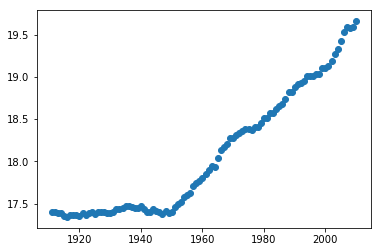

In [10]:
#
# filter out the NaN values
#
smoothed_df = smoothed_df[smoothed_df['AvgTemp'].notnull()]
#
# quick plot to understand what we have so far
#
fig, ax = plt.subplots()
ax.scatter(smoothed_df.index, smoothed_df['AvgTemp'])
plt.show()

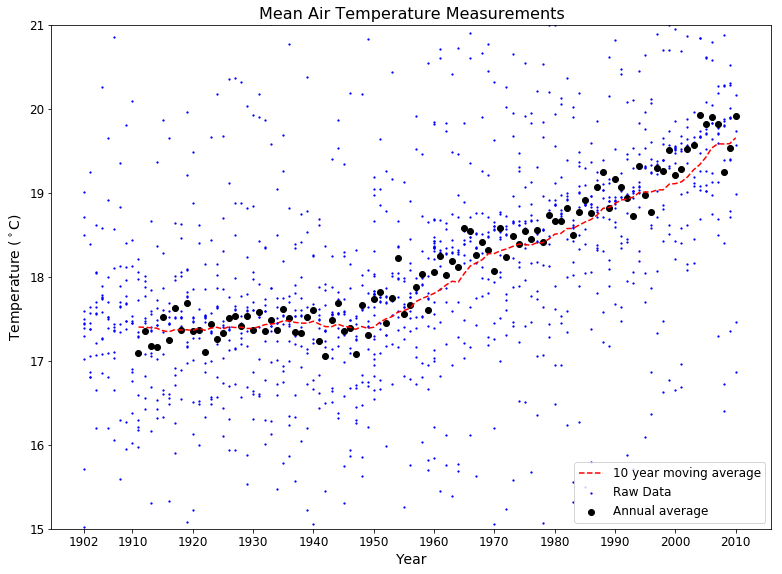

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
#
# Annual averages
#
annual_plot_data = df_group_year.filter(items = smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, 
           annual_plot_data.AvgTemp, 
           label = 'Annual average', c = 'k')
#
# Moving averages
#
ax.plot(smoothed_df.index, 
        smoothed_df.AvgTemp, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()

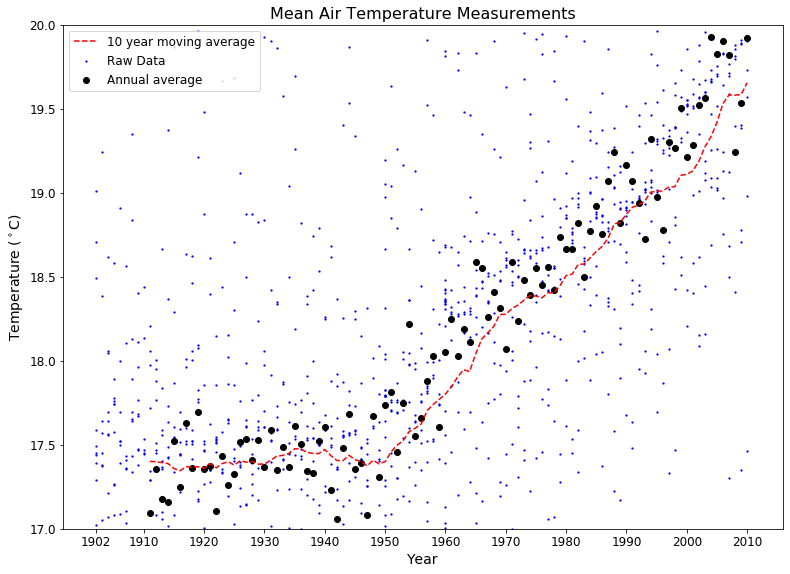

In [12]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', c = 'blue',
           s = 1.5)
#
# Annual averages
#
annual_plot_data = df_group_year.filter(items = smoothed_df.index, axis = 0)
ax.scatter(annual_plot_data.index, 
           annual_plot_data.AvgTemp, 
           label = 'Annual average', c = 'k')
#
# Moving averages
#
ax.plot(smoothed_df.index, 
        smoothed_df.AvgTemp, 
        c = 'r', 
        linestyle = '--', 
        label = f'{window} year moving average')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(17, 20)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()